In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../data/train_big.csv")
test = pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,target
0,0.0,0.326087,0.419753,0.255132,0.377072,0.770751,0.0
1,0.0,0.315217,0.333333,0.121408,0.690608,0.541502,0.0
2,0.0,0.315217,0.259259,0.203519,0.377072,0.766798,0.0
3,1.0,0.608696,0.629630,0.245161,0.403315,0.027668,0.0
4,0.0,0.663043,0.592593,0.228739,0.415746,0.822134,0.0


In [4]:
test.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,target
0,0.0,0.597826,0.567901,0.209384,0.446133,0.782609,0.0
1,1.0,0.902174,0.753086,0.140762,0.566298,0.399209,1.0
2,1.0,0.326087,0.271605,0.178299,0.527624,0.462451,0.0
3,0.0,0.869565,0.691358,0.241056,0.412983,0.055336,0.0
4,0.0,0.771739,0.580247,0.401173,0.277624,0.509881,0.0


In [6]:
x_train_use, y_train_use= train.drop('target', axis=1), train['target']

In [7]:
x_train,x_val, y_train, y_val=train_test_split(x_train_use, y_train_use, train_size=0.8, random_state=42)

In [8]:
x_train.shape

(12355, 6)

### Decision Tree Classifier

#### Max Depth 3

In [9]:
param_grid = {
    'max_depth': list(range(3, 7)),  
    'max_features': list(range(3, 7))  
}


In [10]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)


In [11]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6]})

In [12]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_

In [13]:
best_param

{'max_depth': 6, 'max_features': 6}

In [14]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=6, random_state=42)

In [15]:
y_pred=best_model.predict(x_train)

In [16]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      6154
         1.0       0.94      0.96      0.95      6201

    accuracy                           0.95     12355
   macro avg       0.95      0.95      0.95     12355
weighted avg       0.95      0.95      0.95     12355



In [17]:
def plot_confusion_matrix(title,conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()
    plt.savefig("../conf/"+title+".png")

In [18]:
conf=confusion_matrix(y_train, y_pred)

<AxesSubplot:>

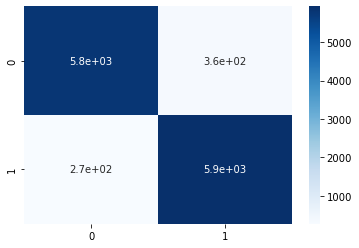

In [19]:
#plot_confusion_matrix("Decision_Tree_Classfier_Train",conf)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [20]:
y_pred_val=best_model.predict(x_val)

In [21]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      1568
         1.0       0.94      0.95      0.94      1521

    accuracy                           0.94      3089
   macro avg       0.94      0.94      0.94      3089
weighted avg       0.94      0.94      0.94      3089



In [22]:
conf_val=confusion_matrix(y_val, y_pred_val)

<AxesSubplot:>

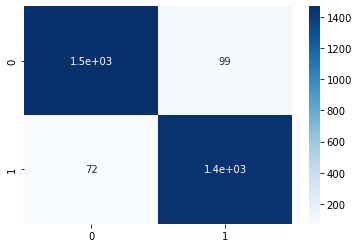

In [23]:
#plot_confusion_matrix("Decision_Tree_Classfier_Validate",conf_val)
sns.heatmap(conf_val, annot=True, cmap= "Blues")

### Extract Result

In [24]:
import time

start=time.time()

best_model.fit(x_train_use, y_train_use)

elapse=time.time()-start

In [25]:
pred_use= best_model.predict(x_train_use)

In [26]:
cross_val_score(best_model, x_train_use, y_train_use, scoring='f1')

array([0.9321817 , 0.94071914, 0.94571153, 0.94585987, 0.94327597])

In [27]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      7722
         1.0       0.94      0.96      0.95      7722

    accuracy                           0.95     15444
   macro avg       0.95      0.95      0.95     15444
weighted avg       0.95      0.95      0.95     15444



In [28]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [29]:
x_test, y_test= test.drop('target', axis=1), test['target']

In [30]:
pred_test=best_model.predict(x_test)

In [31]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      1939
         1.0       0.30      0.79      0.43        61

    accuracy                           0.94      2000
   macro avg       0.65      0.86      0.70      2000
weighted avg       0.97      0.94      0.95      2000



In [32]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [33]:
conf_test=confusion_matrix(y_test, pred_test)

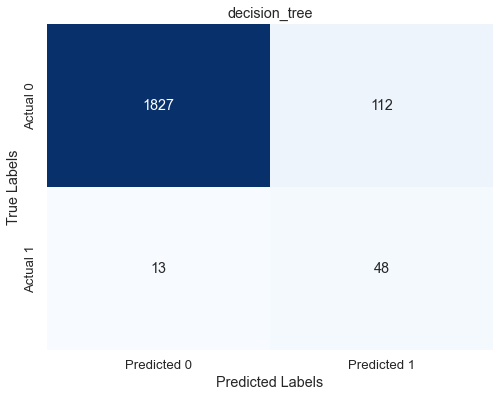

<Figure size 432x288 with 0 Axes>

In [34]:
plot_confusion_matrix("decision_tree",conf_test)

In [35]:
df=pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "Decision Tree"
df["elapsed"] = elapse

In [36]:
df.head()

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed
0,0.434389,0.950138,0.944125,0.3,0.956229,0.786885,Decision Tree,0.033798


In [37]:
df.to_csv("../results/regular/dtc.csv", index=False)